# An Introduction to Signal Detection Theory
### This notebook is meant to augment Lecture 2 of Spring Semester Prosem. of the Vision Science PhD program at SUNY College of Optometry
##### by Bonnie Cooper  bcooper@sunyopt.edu

Signal Detection Theory (SDT) provides a set of methods for interpreting noisy data where accuracy of the result is of interet. The groundwork for SDT was developed for military applications during WW2. For example, radar operators were faced with the challenged of reliably discriminating target signals from noise signals from the readouts of thier instrumentation. Decisions were costly: miss a target and waste a strategic gain, mistak noise for target and risk the misallocation of resources. SDT was formalized in the early 50s and soon therafter Green & Swets applied SDT to psychophysics in thier seminole text, 'Signal Detection Theory & Psychophysics' (1966). Green & Swets were frustrated by how the field of psychophysics at the time was unable to disassociate a subjects true sensitivity to a sensory signal from the responses biases inherent to the cognitive process of decision making. SDT is very helpful for understanding the decision criteria employed by a subject

SDT assumes noise. SDT assumes that noise is present, pervasive & constant is the system that the subject is observing. SDT assumes that noise is added to signals experienced by the observer. Let us demonstrate this by adding some noise to simulated data:

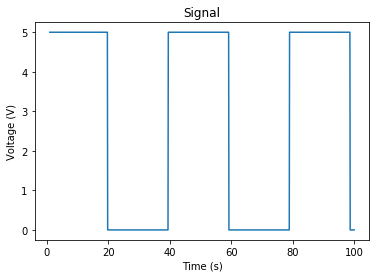

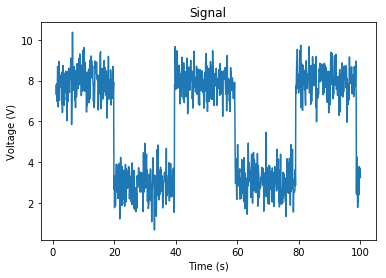

1000


In [29]:
#       _                        _ _   _       _   _                                      _       _     _           
#      | |                      (_) | | |     | | | |                                    (_)     | |   | |          
# _ __ | | __ _ _   _  __      ___| |_| |__   | |_| |__   ___  ___  ___  __   ____ _ _ __ _  __ _| |__ | | ___  ___ 
#| '_ \| |/ _` | | | | \ \ /\ / / | __| '_ \  | __| '_ \ / _ \/ __|/ _ \ \ \ / / _` | '__| |/ _` | '_ \| |/ _ \/ __|
#| |_) | | (_| | |_| |  \ V  V /| | |_| | | | | |_| | | |  __/\__ \  __/  \ V / (_| | |  | | (_| | |_) | |  __/\__ \
#| .__/|_|\__,_|\__, |   \_/\_/ |_|\__|_| |_|  \__|_| |_|\___||___/\___|   \_/ \__,_|_|  |_|\__,_|_.__/|_|\___||___/
#| |             __/ |                                                                                              
#|_|            |___/                                                                                               
mean_baseline = 3
mean_signal = 5
# 
#-------------------------------------------------------------------------------------------------------------------



import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 5*np.sin(t/(2*np.pi))
# Set a target SNR
target_snr_db = 20
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = mean_baseline
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(y_volts))
# Noise up the original signal
y_volts = x_volts + noise_volts

#square waves1 
sqrwv1 =  x_volts
sqrwv1[sqrwv1 > 0] = mean_signal
sqrwv1[sqrwv1 < 0] = 0
sqrwv1_NOISE = sqrwv1 + noise_volts

plt.plot(t, sqrwv1)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

plt.plot(t, sqrwv1_NOISE)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

print( len(y_volts))

Now let's simulte the collection of multiple samples (numSamples) of both signal and noise data.
Then we will visualize the results as a histogram.
Play with the values of the variables in the previous and the following cells to see how this effects the distribution of the data

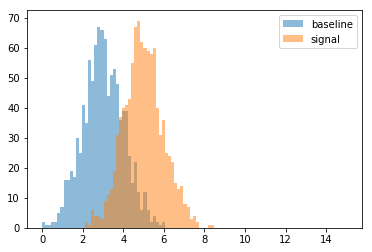

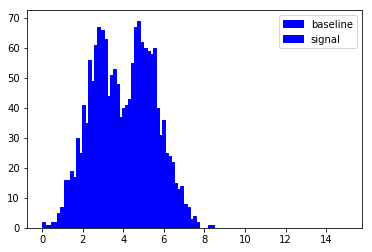

In [42]:
#       _                        _ _   _       _   _                                      _       _     _           
#      | |                      (_) | | |     | | | |                                    (_)     | |   | |          
# _ __ | | __ _ _   _  __      ___| |_| |__   | |_| |__   ___  ___  ___  __   ____ _ _ __ _  __ _| |__ | | ___  ___ 
#| '_ \| |/ _` | | | | \ \ /\ / / | __| '_ \  | __| '_ \ / _ \/ __|/ _ \ \ \ / / _` | '__| |/ _` | '_ \| |/ _ \/ __|
#| |_) | | (_| | |_| |  \ V  V /| | |_| | | | | |_| | | |  __/\__ \  __/  \ V / (_| | |  | | (_| | |_) | |  __/\__ \
#| .__/|_|\__,_|\__, |   \_/\_/ |_|\__|_| |_|  \__|_| |_|\___||___/\___|   \_/ \__,_|_|  |_|\__,_|_.__/|_|\___||___/
#| |             __/ |                                                                                              
#|_|            |___/                  
numSamples = 1000
baseline_noiseSigma = 1
signal_noiseSigma = 1
#
#------------------------------------------------------------------------------------------------------------------


import random
import numpy
from matplotlib import pyplot

baseline = np.array([random.gauss(mean_baseline,baseline_noiseSigma) for _ in range(numSamples)])
signal = np.array([random.gauss(mean_signal,signal_noiseSigma) for _ in range(numSamples)])

bins = numpy.linspace( 0, 15, 100)

pyplot.hist(baseline, bins, alpha=0.5, label='baseline')
pyplot.hist(signal, bins, alpha=0.5, label='signal')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(baseline, bins, color = "blue", ec="blue", alpha=1, label='baseline')
pyplot.hist(signal, bins, color = "blue", ec="blue", alpha=1, label='signal')
pyplot.legend(loc='upper right')
pyplot.show()


Dependng on the variables we used, it may only be obvious that there are two seperate distribution if we specifically set the values different colors. However, in the real world data does not always come with a clear label.

Let's pick an arbitrary values to be a criterion for an example Ideal Observer Response. An ideal observer will act in a binary manner: everything below the threshold will be considered noise and everything equal to or above threshold will be considered signal.  
We will then calculate the hits, misses, false alarms and correct reject rates for this criterion.

In [48]:
#       _                        _ _   _       _   _     _                       _       _     _      
#      | |                      (_) | | |     | | | |   (_)                     (_)     | |   | |     
# _ __ | | __ _ _   _  __      ___| |_| |__   | |_| |__  _ ___  __   ____ _ _ __ _  __ _| |__ | | ___ 
#| '_ \| |/ _` | | | | \ \ /\ / / | __| '_ \  | __| '_ \| / __| \ \ / / _` | '__| |/ _` | '_ \| |/ _ \
#| |_) | | (_| | |_| |  \ V  V /| | |_| | | | | |_| | | | \__ \  \ V / (_| | |  | | (_| | |_) | |  __/
#| .__/|_|\__,_|\__, |   \_/\_/ |_|\__|_| |_|  \__|_| |_|_|___/   \_/ \__,_|_|  |_|\__,_|_.__/|_|\___|
#| |             __/ |                                                                                
#|_|            |___/            
criterion = 4
#
#------------------------------------------------------------------------------------------------------------------

hit = signal[signal>=criterion]
miss = signal[signal<criterion]
fa = baseline[baseline>=criterion] #false alarms
cr = baseline[baseline<criterion] #correct rejects

hitrate = len(hit)/len(signal)
missrate = len(miss)/len(signal)
farate = len(fa)/len(baseline)
crrate = len(cr)/len(baseline)

print("Hit rate: {:.2f}".format(hitrate))
print("Miss rate: {:.2f}".format(missrate))
print("False alarm rate: {:.2f}".format(farate))
print("Correct rejection rate: {:.2f}".format(crrate))

Hit rate: 0.84
Miss rate: 0.15
False alarm rate: 0.17
Correct rejection rate: 0.83


Now we can calculate the d' (d prime), or sensitivity index for the data with this particular criterion. The d' informs us about the degree of seperation of the means of the signal and noise distributions while weighing them against the respective standard deviations.

In [50]:
from scipy import stats
dprime = stats.norm.ppf(hitrate) - stats.norm.ppf(farate)
print("d prime: {:.2f}".format(dprime))

d prime: 1.97


Now, let's assume that it is very costly to miss a signal. Perhaps your subject is being given a jiuce reward and is very motivated to get this treat!
Such an observer would place the criterion very low to recieve the maximum reward even though it means accepting a higher false positive rate.  
  
Will the d' be higher or lower?

In [52]:
criterion = 3
hit = signal[signal>=criterion]
miss = signal[signal<criterion]
fa = baseline[baseline>=criterion] #false alarms
cr = baseline[baseline<criterion] #correct rejects

hitrate = len(hit)/len(signal)
missrate = len(miss)/len(signal)
farate = len(fa)/len(baseline)
crrate = len(cr)/len(baseline)

print("Hit rate: {:.2f}".format(hitrate))
print("False alarm rate: {:.2f}".format(farate))
from scipy import stats
dprime = stats.norm.ppf(hitrate) - stats.norm.ppf(farate)
print("d prime: {:.2f}".format(dprime))

Hit rate: 0.98
False alarm rate: 0.49
d prime: 2.09


Now let's assume that there is a penalty for incorrectly indicating the presense of the signal. Maybe an annoying sound is played in the psychopysics lab, or perhaps the subject gets less payment (would the IRB approve that?!?)
  
Will the d' be higher or lower?

In [53]:
criterion = 5.5
hit = signal[signal>=criterion]
miss = signal[signal<criterion]
fa = baseline[baseline>=criterion] #false alarms
cr = baseline[baseline<criterion] #correct rejects

hitrate = len(hit)/len(signal)
missrate = len(miss)/len(signal)
farate = len(fa)/len(baseline)
crrate = len(cr)/len(baseline)

print("Hit rate: {:.2f}".format(hitrate))
print("False alarm rate: {:.2f}".format(farate))
from scipy import stats
dprime = stats.norm.ppf(hitrate) - stats.norm.ppf(farate)
print("d prime: {:.2f}".format(dprime))

Hit rate: 0.29
False alarm rate: 0.01
d prime: 1.90


Next we will generate an ROC Curve. An ROC curve will visualize the d' values as the hit rate x the false alarm rate for all possible criteria settings.

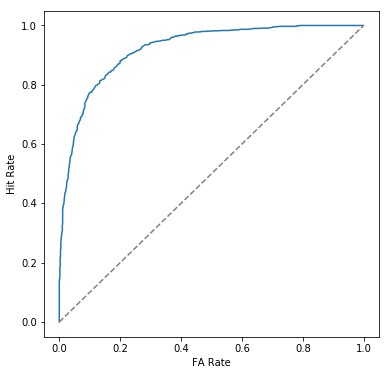

In [56]:

criterions = np.linspace(10, 0, 1000)
hit_rates = [len(signal[signal>c])/len(signal) for c in criterions]
fa_rates = [len(baseline[baseline>c])/len(baseline) for c in criterions]

f, ax = plt.subplots(figsize=(6, 6))
ax.plot(fa_rates, hit_rates)
ax.plot([0, 1], [0, 1], ls="--", c=".5")
ax.set(xlabel="FA Rate", ylabel="Hit Rate");

Now to calculate the AUC: Area Under the Curve

In [57]:
from scipy.integrate import trapz
auc = trapz(hit_rates, fa_rates)
print("Area under ROC curve: {:.2f}".format(auc))

Area under ROC curve: 0.92
